<a href="https://colab.research.google.com/github/christos8566/freecodecamp_data_analysis.res/blob/main/Exercise_2_sakila_db.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercises
The Sakila Database
One of the best example databases out there is the Sakila Database, which was originally created by MySQL and has been open sourced under the terms of the BSD License.

The Sakila database is a nicely normalised schema modelling a DVD rental store, featuring things like films, actors, film-actor relationships, and a central inventory table that connects films, stores, and rentals.

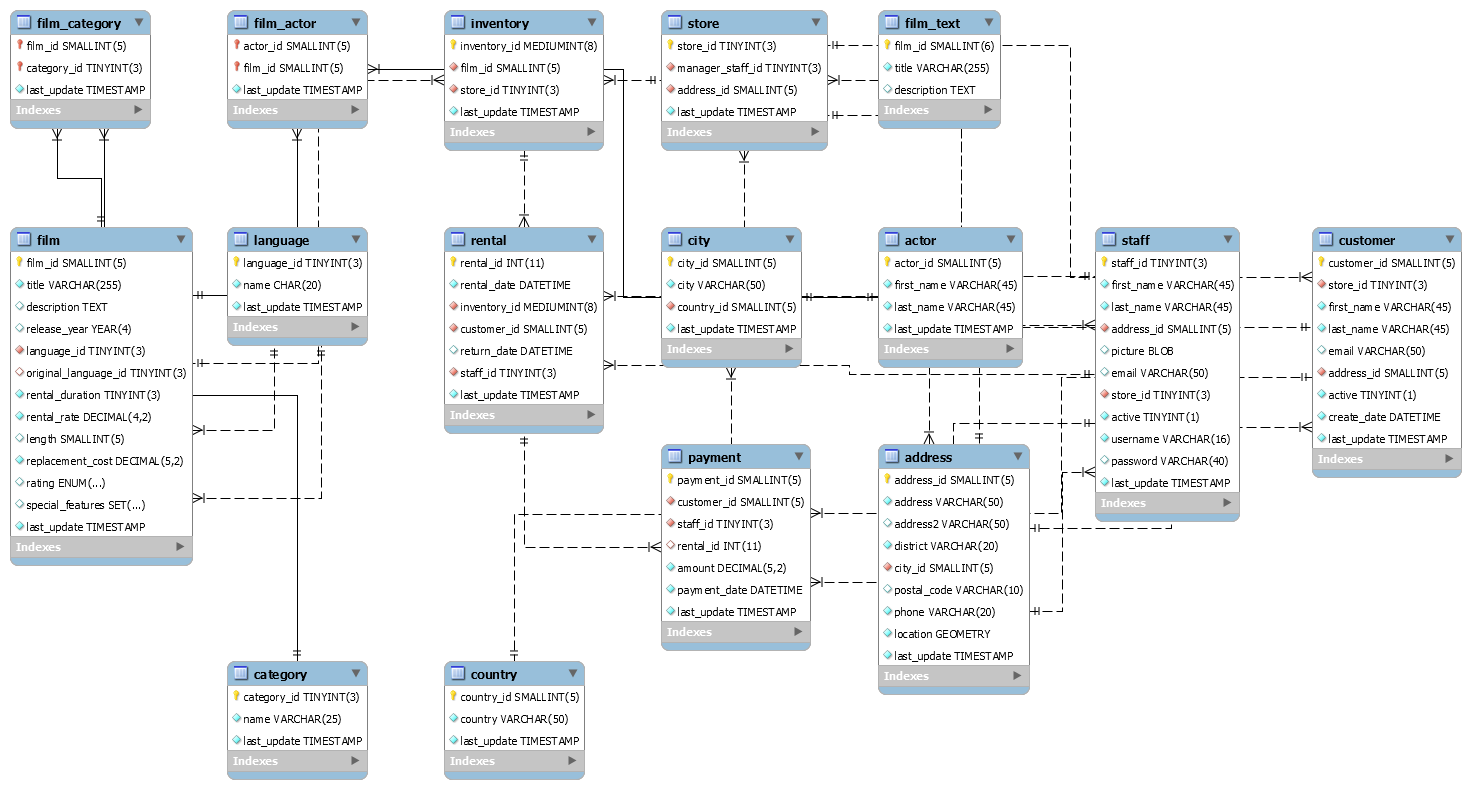

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [8]:
db_con = sqlite3.connect('/content/drive/MyDrive/free_code_camp/Data_analysis_python/data/sakila.db')

df = pd.read_sql('''
    SELECT
        rental.rental_id, rental.rental_date, rental.return_date,
        customer.last_name AS customer_lastname,
        store.store_id,
        city.city AS rental_store_city,
        film.title AS film_title, film.rental_duration AS film_rental_duration,
        film.rental_rate AS film_rental_rate, film.replacement_cost AS film_replacement_cost,
        film.rating AS film_rating
    FROM rental
    INNER JOIN customer ON rental.customer_id == customer.customer_id
    INNER JOIN inventory ON rental.inventory_id == inventory.inventory_id
    INNER JOIN store ON inventory.store_id == store.store_id
    INNER JOIN address ON store.address_id == address.address_id
    INNER JOIN city ON address.city_id == city.city_id
    INNER JOIN film ON inventory.film_id == film.film_id
    ;
''', db_con, index_col = 'rental_id', parse_dates = ['rental_date', 'return_date'])

In [9]:
df.head()

,rental_date,return_date,customer_lastname,store_id,rental_store_city,film_title,film_rental_duration,film_rental_rate,film_replacement_cost,film_rating
rental_id,,,,,,,,,,
1,2005-05-24 22:53:30,2005-05-26 22:04:30,HUNTER,1,Lethbridge,BLANKET BEVERLY,7,2.99,21.99,G
2,2005-05-24 22:54:33,2005-05-28 19:40:33,COLLAZO,2,Woodridge,FREAKY POCUS,7,2.99,16.99,R
3,2005-05-24 23:03:39,2005-06-01 22:12:39,MURRELL,2,Woodridge,GRADUATE LORD,7,2.99,14.99,G
4,2005-05-24 23:04:41,2005-06-03 01:43:41,PURDY,1,Lethbridge,LOVE SUICIDES,6,0.99,21.99,R
5,2005-05-24 23:05:21,2005-06-02 04:33:21,HANSEN,2,Woodridge,IDOLS SNATCHERS,5,2.99,29.99,NC-17


## What's the mean of film_rental_duration?


In [10]:
df['film_rental_duration'].mean()

4.935489902767389

## What's the most common rental duration?


In [11]:
df['film_rental_duration'].value_counts().head(1)

3    3412
Name: film_rental_duration, dtype: int64

Show a **bar plot** with all the durations.



<Axes: >

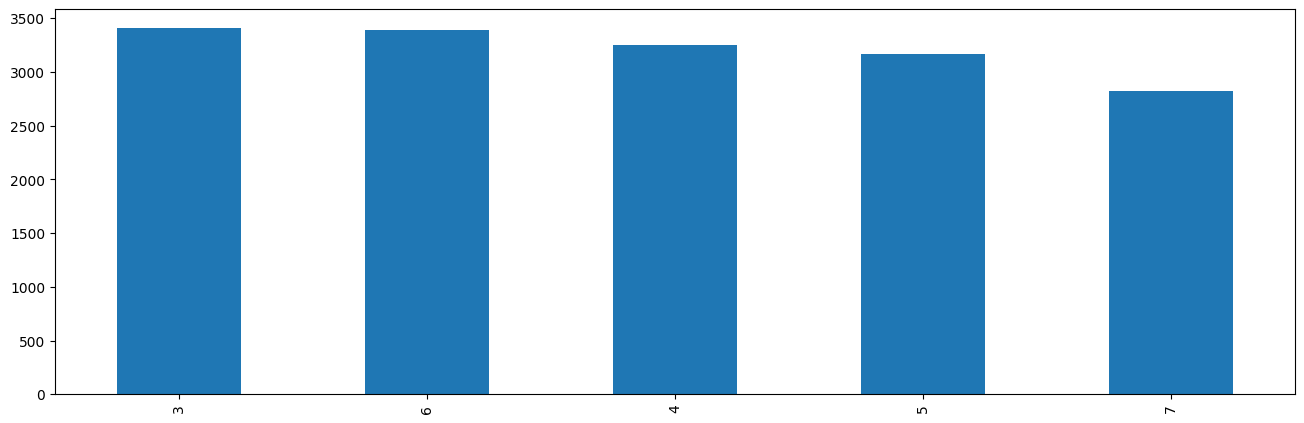

In [ ]:
df['film_rental_duration'].value_counts().plot(kind = 'bar', figsize = [16, 5])

## What is the most common rental rate?

* Show a pie plot with all possible rental rates.
* Show a bar plot with all possible rental rates.
* Which plot you think fits the best in this case? Why?









<Axes: ylabel='film_rental_rate'>

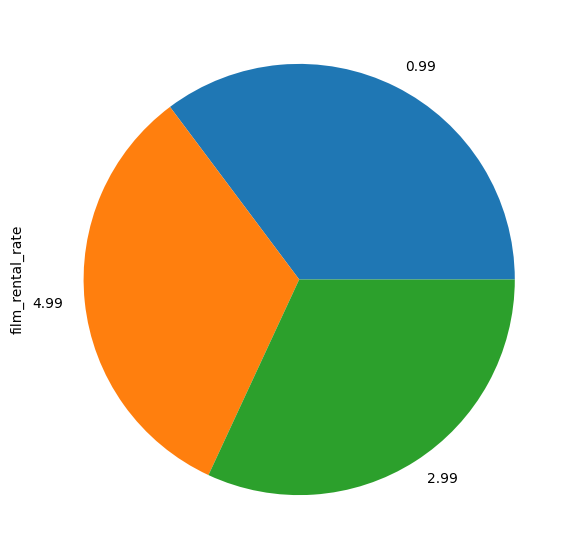

In [ ]:
df['film_rental_rate'].value_counts().plot(kind = 'pie', figsize = [7, 7])

<Axes: >

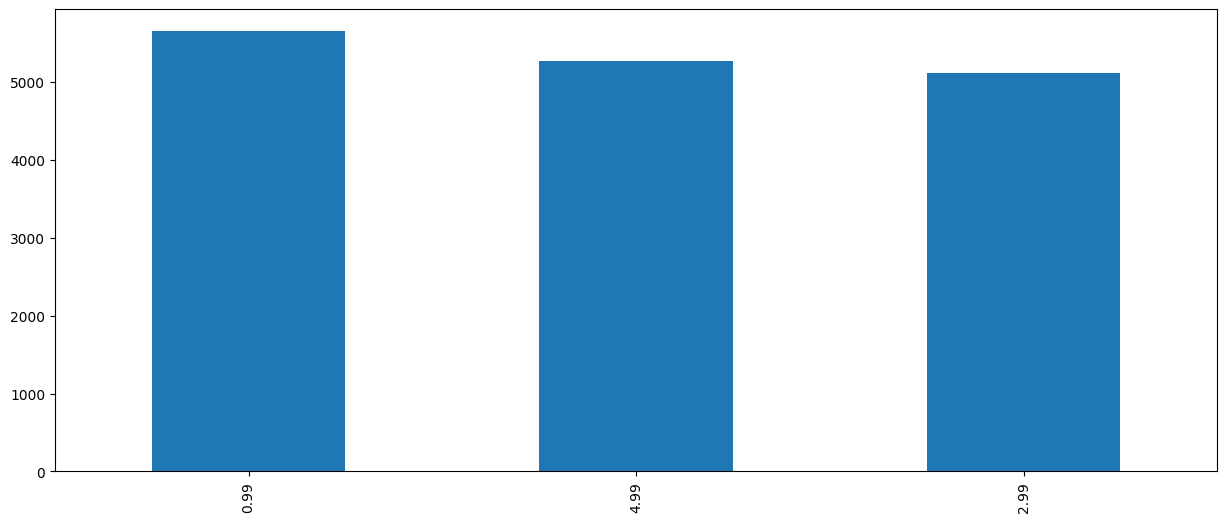

In [ ]:
df['film_rental_rate'].value_counts().plot(kind = 'bar', figsize = [15, 6])

## How is the replacement cost distributed?

* Show a **box plot** of the replacement costs.
* Show a **density plot** of the replacement costs.
* Add a **red line** on the mean.
* Add a **green line** on the median median.

<Axes: >

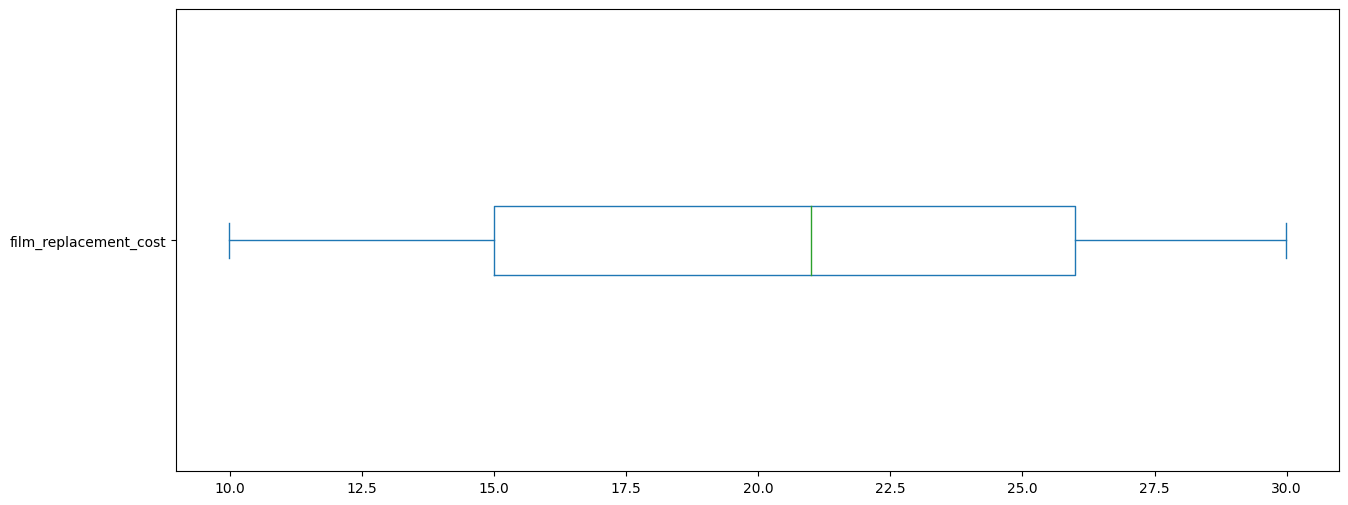

In [ ]:
df['film_replacement_cost'].plot(kind = 'box', vert = False, figsize = [15, 6])

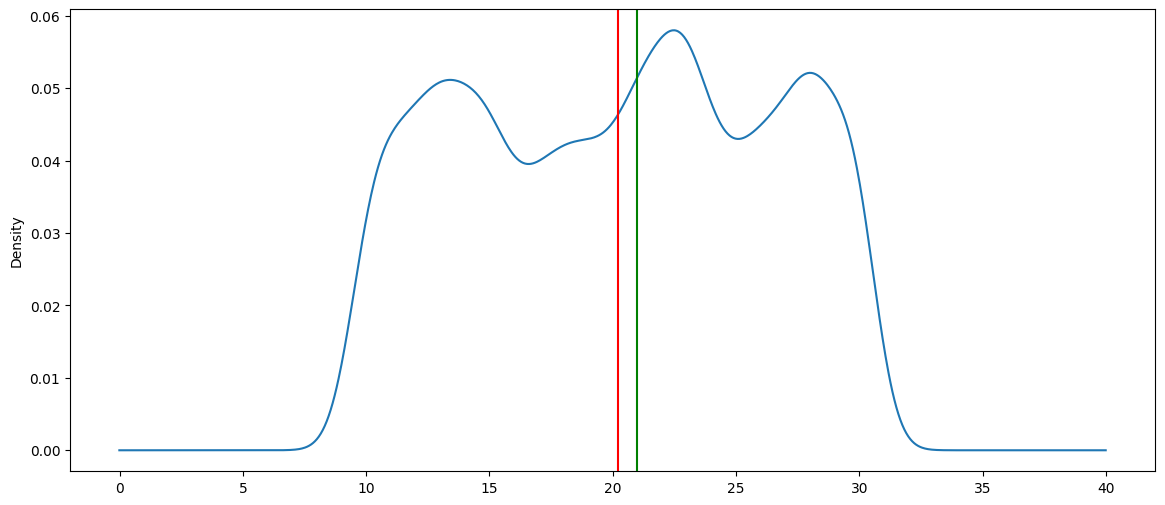

In [ ]:
ax = df['film_replacement_cost'].plot(kind = 'density', figsize = [14, 6])

ax.axvline(df['film_replacement_cost'].mean(), color = 'red')
ax.axvline(df['film_replacement_cost'].median(), color = 'green')


## How many films of each rating do we have?

* how the raw count of each film rating.
* Show a **bar plot** with all possible film ratings

In [ ]:
df['film_rating'].value_counts()

PG-13    3585
NC-17    3293
PG       3212
R        3181
G        2773
Name: film_rating, dtype: int64

<Axes: >

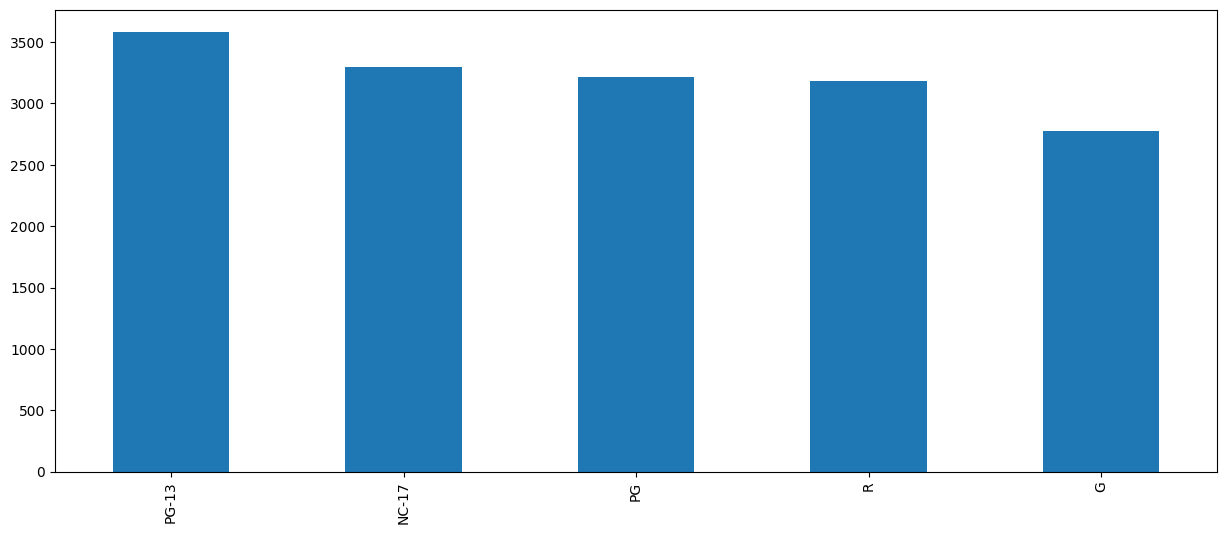

In [ ]:
df['film_rating'].value_counts().plot(kind = 'bar', figsize = [15, 6])

## Does the film replacement cost vary depending on film rating?

In the United States, film classification is a voluntary process with the ratings issued by the Motion Picture Association of America (MPAA) via the Classification and Rating Administration (CARA).

* **G** (General Audiences): All Ages are Admitted.
* **PG** (Parental Guidance Suggested): Some Material May Not Be Suitable for Children.
* **PG-13** (Parents Strongly Cautioned): Some Material May Be Inappropriate for Children Under 13.
* **R** (Restricted): Under 17 Requires Accompanying Parent or Adult Guardian.
* **NC-17** (Adults Only): No One 17 and Under Admitted.

Show a grouped **box plot** per film rating with the film replacement costs.


<Axes: title={'center': 'film_replacement_cost'}, xlabel='[film_rating]'>

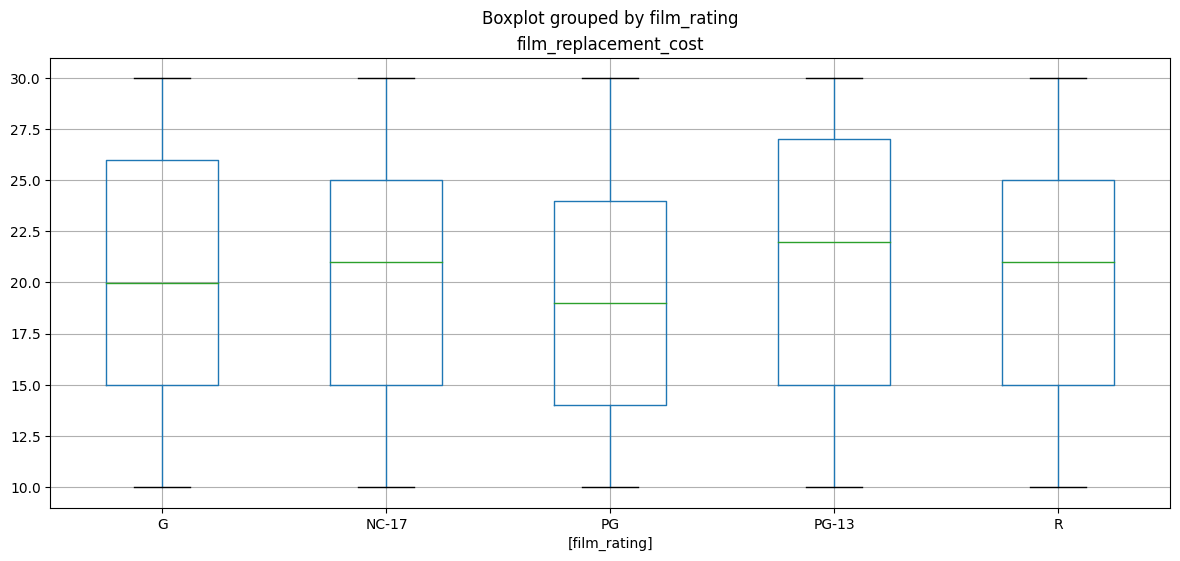

In [12]:
#df.columns.unique()
df[['film_replacement_cost', 'film_rating']].boxplot(by = 'film_rating', figsize = [14, 6])


## Add and calculate a new rental_days column

This numeric column should have the count of days between **rental_date** and **return_date**.

In [13]:
df['rental_days'] = df[['rental_date', 'return_date']].apply(lambda x : (x[1] - x[0]).days, axis = 1)
df['rental_days'].head()

rental_id
1    1.0
2    3.0
3    7.0
4    9.0
5    8.0
Name: rental_days, dtype: float64

## Analyze the distribution of rental_days

* Calculate the **mean** of rental_days.
* Show a **density** (KDE) of rental_days.

In [19]:
df['rental_days'].mean().round(2)
#df['rental_days'].head()

4.53

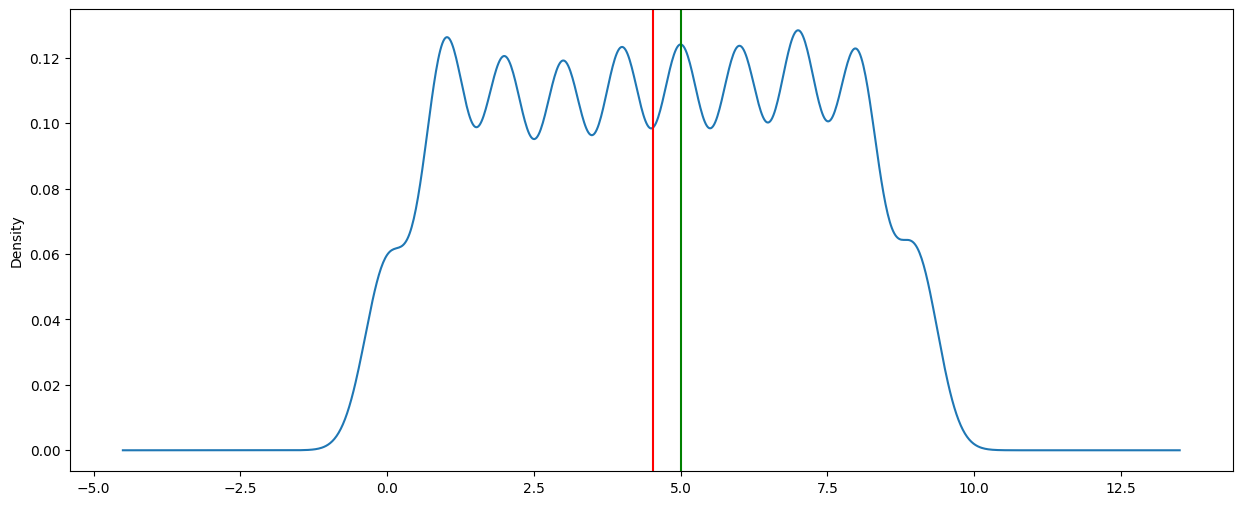

In [23]:
ax = df['rental_days'].plot(kind = 'density', figsize = [15, 6])
ax.axvline(df['rental_days'].mean(), color = 'red')
ax.axvline(df['rental_days'].median(), color = 'green')

## Add and calculate a new film_daily_rental_rate column

This value should be the division of `film_rental_rate` by `film_rental_duration`.

In [24]:
df['film_daily_rental_rate'] = df['film_rental_rate'] / df['film_rental_duration']
df['film_daily_rental_rate'].head()

rental_id
1    0.427143
2    0.427143
3    0.427143
4    0.165000
5    0.598000
Name: film_daily_rental_rate, dtype: float64

## Analyze the distribution of film_daily_rental_rate

* Calculate the **mean** of `film_daily_rental_rate`.
* Show a **density (KDE)** of `film_daily_rental_rate`.

In [26]:
df['film_daily_rental_rate'].mean().round(2)

0.65

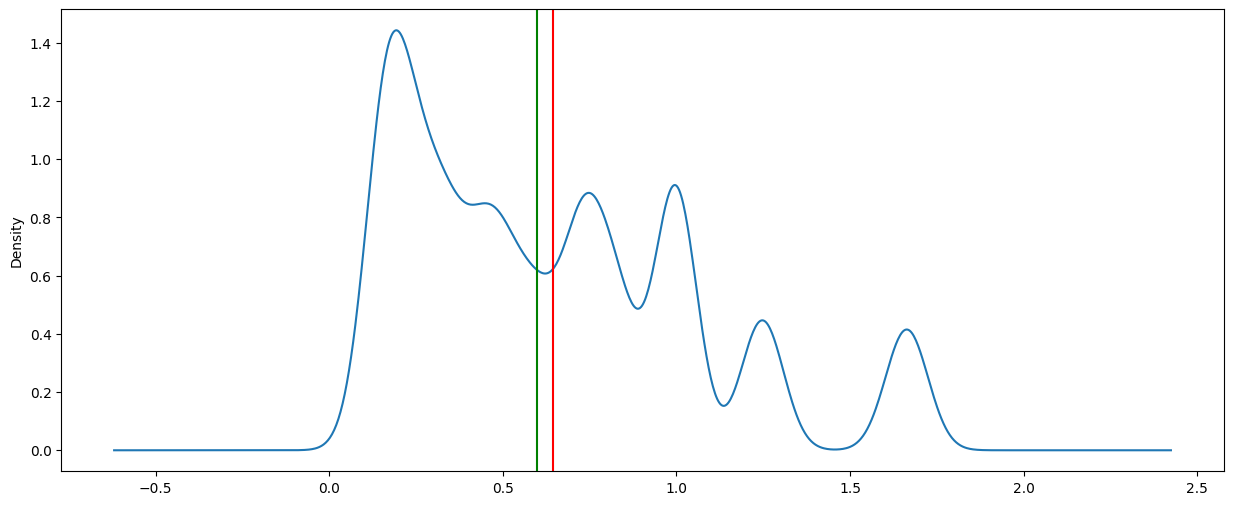

In [30]:
ax = df['film_daily_rental_rate'].plot(kind = 'density', figsize = [15, 6])
ax.axvline(df['film_daily_rental_rate'].mean(), color = 'red')
ax.axvline(df['film_daily_rental_rate'].median(), color = 'green')

## List 10 films with the lowest daily rental rate


In [40]:
#df.columns.unique()
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].min(), 'film_title'].head(10).unique()


array(['ROMAN PUNK', 'BORROWERS BEDAZZLED', 'GUN BONNIE', 'GREEDY ROOTS',
       'PATIENT SISTER', 'GANDHI KWAI', 'VALENTINE VANISHING',
       'UNFORGIVEN ZOOLANDER', 'LIGHTS DEER'], dtype=object)

## List 10 films with the highest daily rental rate


In [41]:
df.loc[df['film_daily_rental_rate'] == df['film_daily_rental_rate'].max(), 'film_title'].head(10).unique()

array(['KING EVOLUTION', 'MINDS TRUMAN', 'TEEN APOLLO', 'SHOW LORD',
       'WIFE TURN', 'BACKLASH UNDEFEATED', 'AMERICAN CIRCUS',
       'MIDSUMMER GROUNDHOG', 'BEHAVIOR RUNAWAY', 'KISSING DOLLS'],
      dtype=object)

## How many rentals were made in Lethbridge city?


In [43]:
#df.columns.unique()
df.loc[df['rental_store_city'] == 'Lethbridge'].shape[0]

7923

## How many rentals of each film rating were made in Lethbridge city?

Show a **bar plot** with each film rating count.




In [45]:
#df.columns.unique()
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts()

PG-13    1849
NC-17    1625
R        1537
PG       1535
G        1377
Name: film_rating, dtype: int64

<Axes: >

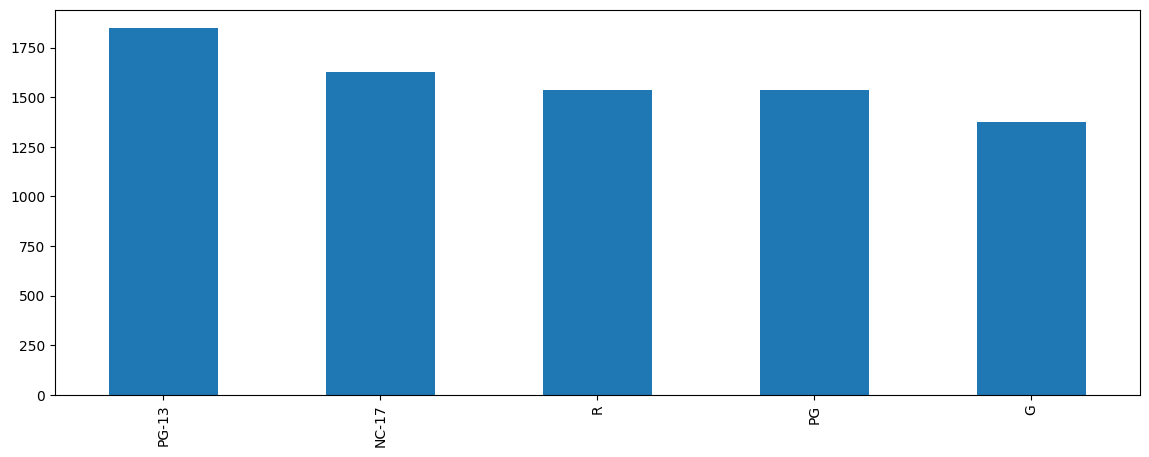

In [47]:
df.loc[df['rental_store_city'] == 'Lethbridge', 'film_rating'].value_counts().plot(kind = 'bar', figsize = [14, 5])

## How many rentals were made in Woodridge city with rental duration higher than 5 days?


In [55]:
df.columns.unique()

df.loc[(df['rental_store_city'] == 'Woodridge') & (df['film_rental_duration'] > 5)].shape[0]


3186

## How many rentals were made at the store with id 2 or with replacement cost lower than 10.99 USD?


In [59]:
#df.columns.unique()

df.loc[(df['store_id'] == 2) | (df['film_replacement_cost'] > 10.99)].shape[0]

15390